# Análisis de Retrasos en Vuelos Domésticos de EE.UU. en 2013

Este análisis explora un conjunto de datos de vuelos domésticos en EE.UU. en 2013, con el objetivo de identificar factores que influyen en los retrasos en la salida o llegada de los vuelos. El proceso comienza con la limpieza del dataset y finaliza con respuestas a preguntas clave sobre el comportamiento de los retrasos.


## Limpieza de Datos

En esta sección, comenzamos cargando los datos y limpiándolos, eliminando valores nulos y outliers.

In [6]:
import pandas as pd

# Cargar el archivo CSV utilizando barras dobles
df_flights = pd.read_csv('C:\\Users\\lhurt\\Downloads\\flights.csv')

# Ver las primeras filas del archivo
df_flights.head()



,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
3,2013,7,22,1,OO,13930,Chicago O'Hare International,Chicago,IL,11042,Cleveland-Hopkins International,Cleveland,OH,804,35,1.0,1027,33,1,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0


### Imputación de valores nulos

Vamos a imputar los valores nulos en la columna `DepDel15`, que indica si la salida fue retrasada más de 15 minutos.


In [8]:
# Imputamos valores nulos en DepDel15 basándonos en DepDelay
df_flights['DepDel15'].fillna(df_flights['DepDelay'].apply(lambda x: 1 if x > 15 else 0), inplace=True)


### Identificación y eliminación de outliers

Eliminamos los outliers de las columnas `DepDelay` y `ArrDelay` usando los percentiles 1% y 99%.


In [9]:
# Definir los umbrales para eliminar outliers
lower_bound_depdelay = df_flights['DepDelay'].quantile(0.01)
upper_bound_depdelay = df_flights['DepDelay'].quantile(0.99)

lower_bound_arrdelay = df_flights['ArrDelay'].quantile(0.01)
upper_bound_arrdelay = df_flights['ArrDelay'].quantile(0.99)

# Filtramos los datos para eliminar outliers
df_cleaned = df_flights[
    (df_flights['DepDelay'] >= lower_bound_depdelay) & (df_flights['DepDelay'] <= upper_bound_depdelay) &
    (df_flights['ArrDelay'] >= lower_bound_arrdelay) & (df_flights['ArrDelay'] <= upper_bound_arrdelay)
]


### Estadísticas generales de retrasos

Ahora visualizamos estadísticas generales del retraso en salida y llegada después de la limpieza de los datos.


In [10]:
# Mostrar estadísticas generales de retrasos
df_cleaned[['DepDelay', 'ArrDelay']].describe()


,DepDelay,ArrDelay
count,264904.000000,264904.000000
mean,8.116940,4.434773
std,24.653549,27.503290
min,-12.000000,-33.000000
25%,-4.000000,-11.000000
50%,-1.000000,-3.000000
75%,9.000000,9.000000
max,166.000000,169.000000


### ¿Cuál es el promedio de retrasos de salida y llegada?


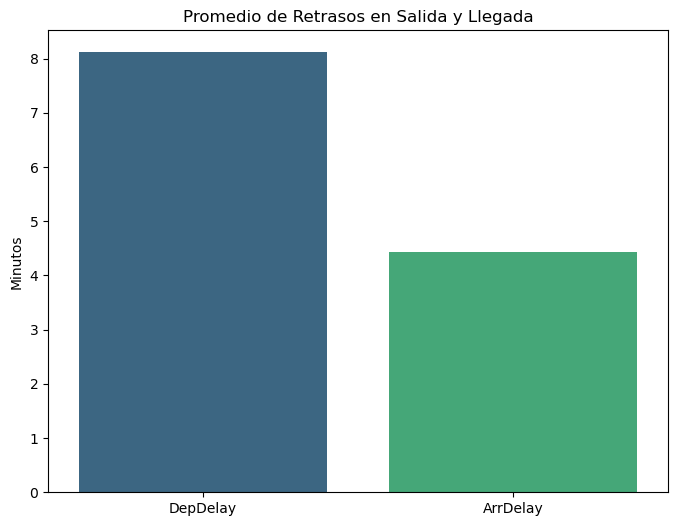

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns


# Cálculo del promedio de retrasos
mean_dep_delay = df_cleaned['DepDelay'].mean()
mean_arr_delay = df_cleaned['ArrDelay'].mean()

# Visualización de los promedios
plt.figure(figsize=(8, 6))
sns.barplot(x=['DepDelay', 'ArrDelay'], y=[mean_dep_delay, mean_arr_delay], palette='viridis')
plt.title('Promedio de Retrasos en Salida y Llegada')
plt.ylabel('Minutos')
plt.show()



### Comparación de rendimiento de las aerolíneas en retrasos de llegada


In [23]:
# Agrupar por aerolínea y calcular el retraso promedio de llegada
carrier_arr_delay = df_cleaned.groupby('Carrier')['ArrDelay'].mean().sort_values()

carrier_arr_delay


Carrier
HA   -0.359409
AS    0.238237
DL    0.345631
9E    2.614430
UA    2.782986
US    2.911298
AA    4.406317
OO    4.608014
FL    5.070426
VX    5.482422
YV    5.778635
WN    6.573770
EV    6.695234
B6    7.425807
F9    9.235939
MQ    9.534102
Name: ArrDelay, dtype: float64

### ¿Hay diferencia en retrasos de llegada según el día de la semana?


In [14]:
# Agrupar por día de la semana y calcular el retraso promedio de llegada
dayofweek_arr_delay = df_cleaned.groupby('DayOfWeek')['ArrDelay'].mean().sort_values()

dayofweek_arr_delay


DayOfWeek
6    1.077065
2    2.649354
7    3.250620
3    4.596182
1    4.858203
5    6.168007
4    7.612533
Name: ArrDelay, dtype: float64

### ¿Qué aeropuerto tiene el mayor retraso promedio de salida?


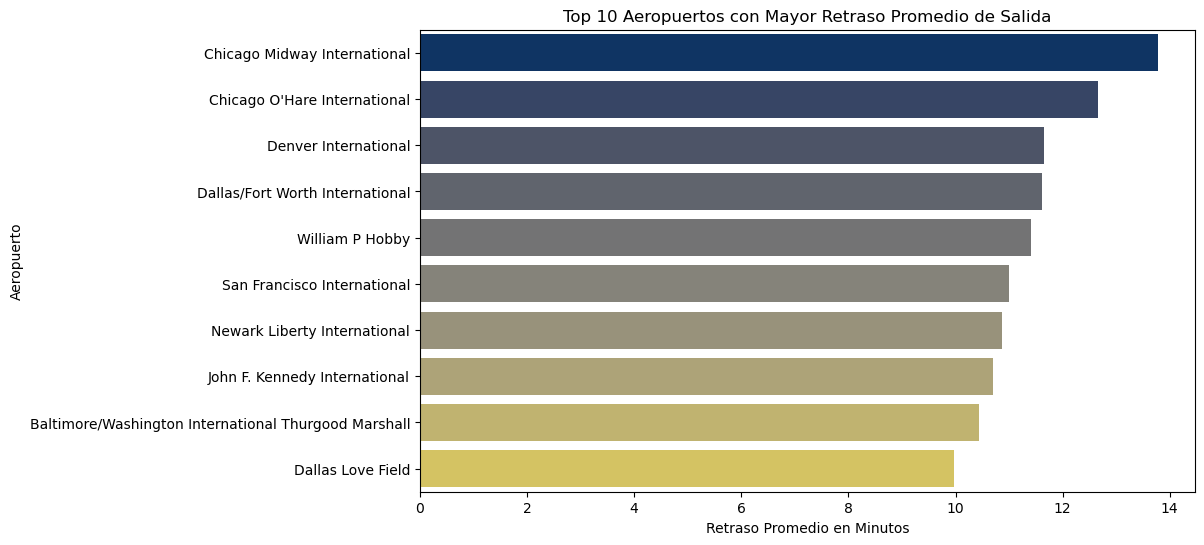

In [24]:
# Agrupamos por aeropuerto de origen y graficamos los retrasos promedio de salida
origin_dep_delay = df_cleaned.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=origin_dep_delay.values, y=origin_dep_delay.index, palette='cividis')
plt.title('Top 10 Aeropuertos con Mayor Retraso Promedio de Salida')
plt.xlabel('Retraso Promedio en Minutos')
plt.ylabel('Aeropuerto')
plt.show()


### ¿Los retrasos de salida tienden a generar retrasos de llegada?


In [26]:
# Calcular la correlación entre los retrasos de salida y llegada
correlation = df_cleaned[['DepDelay', 'ArrDelay']].corr()

correlation


,DepDelay,ArrDelay
DepDelay,1.000000,0.892064
ArrDelay,0.892064,1.000000


### ¿Qué ruta tiene más llegadas tarde?


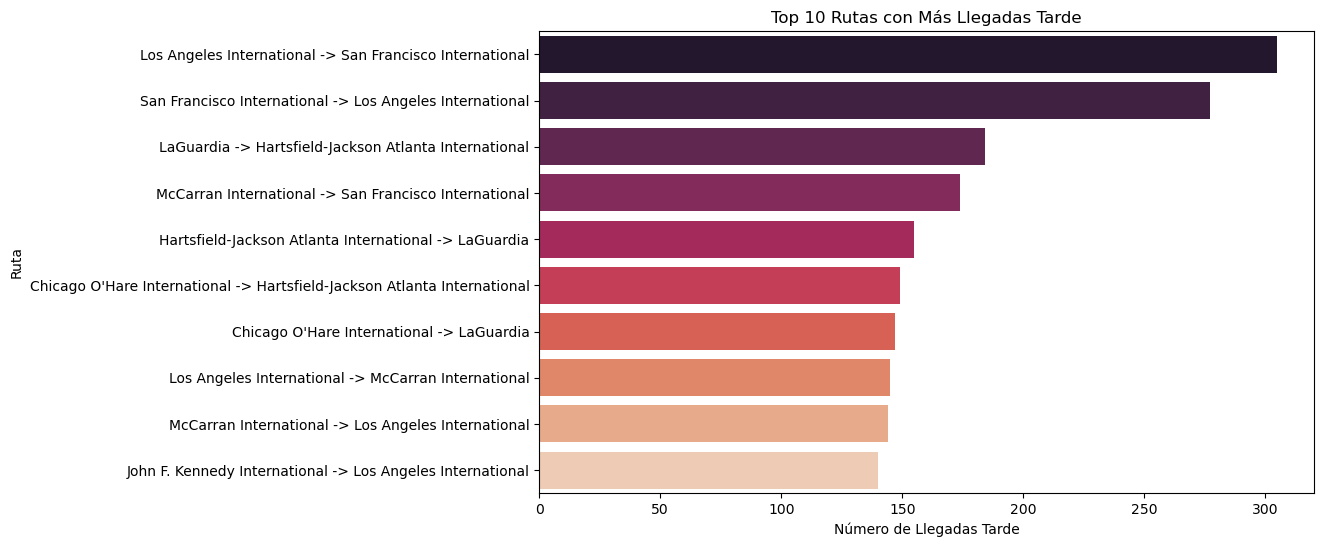

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear la columna 'Route' utilizando .loc para evitar advertencias
df_cleaned.loc[:, 'Route'] = df_cleaned['OriginAirportName'] + " -> " + df_cleaned['DestAirportName']

# Filtrar las llegadas tarde y agrupar por la columna 'Route'
late_arrivals_by_route = df_cleaned[df_cleaned['ArrDel15'] == 1].groupby('Route').size().sort_values(ascending=False).head(10)

# Graficar las 10 rutas con más llegadas tarde
plt.figure(figsize=(10, 6))
sns.barplot(x=late_arrivals_by_route.values, y=late_arrivals_by_route.index, palette='rocket')
plt.title('Top 10 Rutas con Más Llegadas Tarde')
plt.xlabel('Número de Llegadas Tarde')
plt.ylabel('Ruta')
plt.show()



### ¿Qué ruta tiene el mayor retraso promedio de llegada?


In [18]:
# Encontrar la ruta con mayor retraso promedio de llegada
avg_arr_delay_by_route = df_cleaned.groupby('Route')['ArrDelay'].mean().sort_values(ascending=False)

avg_arr_delay_by_route.head()


Route
Pittsburgh International -> Raleigh-Durham International           63.000000
Metropolitan Oakland International -> Logan International          54.111111
Newark Liberty International -> Will Rogers World                  46.466667
Southwest Florida International -> Theodore Francis Green State    44.000000
Cleveland-Hopkins International -> Philadelphia International      40.166667
Name: ArrDelay, dtype: float64